# Compare strain mapping of experimental Si/SiGe stacks using AI/ML and correlation

In [43]:
strainmap_ROI_ml = py4DSTEM.io.read('../../datasets/strain_data/strain_outputs/aiml_exp_thin_Ge_SiGe.h5', data_id='strain_map_rotated');

In [44]:
strainmap_ROI_p4 = py4DSTEM.io.read('../../datasets/strain_data/strain_outputs/corr_exp_thin_Ge_SiGe.h5', data_id='strain_map_rotated');

In [46]:
eels_data = h5py.File('../../datasets/strain_data/Si_SiGe_multilayers_EELS_strain.mat','r') 
imGe= np.asarray(eels_data['imGe'])
imSi= np.asarray(eels_data['imSi'])
strain_exp= np.asarray(eels_data['strain'])
wGe= np.asarray(eels_data['wGe'])
wSi= np.asarray(eels_data['wSi'])

In [47]:
import pandas as pd
strain_ideal_e_xx = np.mean(strain_exp, axis=0)
# Ideal strain signal
probe_step_x_ = np.arange(0,strainmap_ROI_ml.data.shape[1])
strain_ideal_e_yy = np.zeros_like(probe_step_x_)

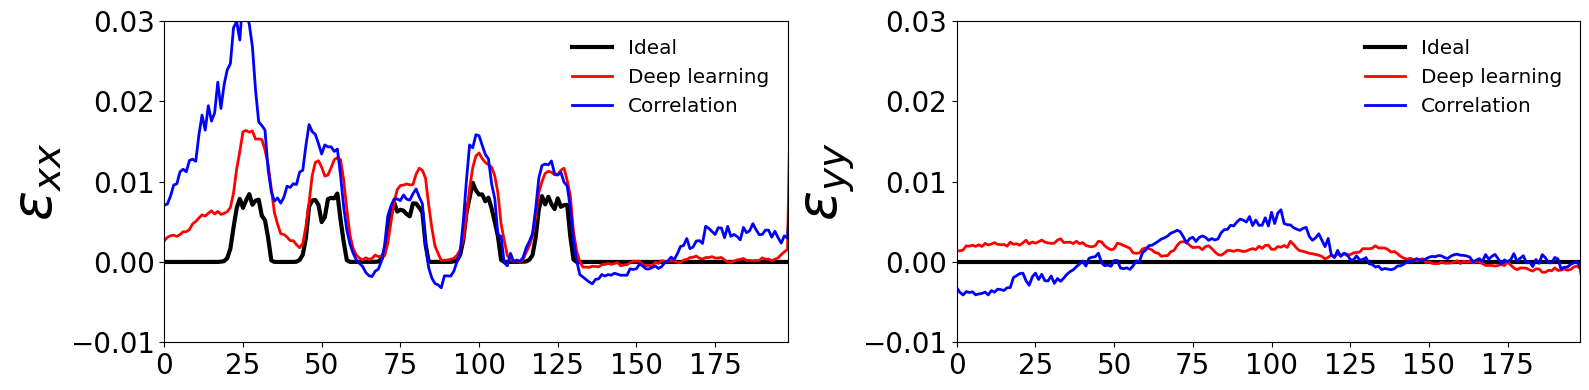

In [48]:
# Get mean E_xx and E_yy strain maps along the perpendicular to growth direction
strain_mean_e_xx_ml = np.mean(strainmap_ROI_ml.slices['e_xx'],axis=0)
strain_mean_e_yy_ml = np.mean(strainmap_ROI_ml.slices['e_yy'],axis=0)

strain_mean_e_xx_p4 = np.mean(strainmap_ROI_p4.slices['e_xx'],axis=0)
strain_mean_e_yy_p4 = np.mean(strainmap_ROI_p4.slices['e_yy'],axis=0)


# Plotting
fig, axs = plt.subplots(1,2,figsize=(16,4))

# strain along x direction
axs[0].plot(
    probe_step_x_, 
    np.roll(strain_ideal_e_xx, -3),
    color='k',
    linestyle='-', linewidth=3, label = 'Ideal');
axs[0].plot(
    probe_step_x_, 
    strain_mean_e_xx_ml,
    color='r', linewidth=2, label = 'Deep learning')
axs[0].plot(
    probe_step_x_, 
    strain_mean_e_xx_p4,
    color='b', linewidth=2,label = 'Correlation')
axs[0].set_xlim(0,198)
axs[0].set_ylim(-0.01,0.03)

# strain along y direction
axs[1].plot(
    probe_step_x_, 
    np.roll(strain_ideal_e_yy,-10),
    color='k',
    linestyle='-',linewidth=3, label = 'Ideal');
axs[1].plot(
    probe_step_x_, 
    strain_mean_e_yy_ml,
    color='r', linewidth=2, label = 'Deep learning')
axs[1].plot(
    probe_step_x_, 
    strain_mean_e_yy_p4,
    color='b', linewidth=2,label = 'Correlation')
axs[1].set_xlim(0,198)
axs[1].set_ylim(-0.01,0.03)
axs[0].legend(frameon=False, fontsize = 'x-large')
axs[1].legend(frameon=False, fontsize = 'x-large')
axs[0].locator_params(axis="y", nbins=4)
axs[1].locator_params(axis="y", nbins=4)
axs[0].locator_params(axis="x", nbins=8)
axs[1].locator_params(axis="x", nbins=8)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
#ax.set_yticklabels(xlabels, fontsize= )
axs[0].set_ylabel(r'$\epsilon_{xx}$', fontsize = 40)
axs[1].set_ylabel(r'$\epsilon_{yy}$', fontsize = 40)
plt.tight_layout()
#fig.savefig('./paper_figs/strain_profile_exp_thin.pdf', dpi=600)
plt.show()